# **Introduction**

Hello! My name is Evan Mains and I'm apart of Team Wealth. We are trying to find the wealthiest neighborhood in Pittsburgh. We agreed upon this idea by using 4 different metrics and datasets. These metrics are Housing Price, Tax Delinquency, Population Density, and Sales Transactions.

# **Metric**

My metric is using population to compare the total amount of wealth to the total amount of people in each neighborhood located in Pittsburgh.

# **Sub-Metric**

My sub-metric was population density. I looked at the population of each neighborhood to determine how many people occupy each neighborhood in Pittsburgh.

# **Dataset**

The dataset I analyzed was the 2010 Pittsburgh SNAP Census Population Density portion of the census.

You can find the link here: 
https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/d5573eb6-a647-42b4-8b17-6e4787e48eeb/download/population-density.xls

# **Code**

In [65]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("Population-Density.csv")

This dataset contains the Population Density for all neighborhoods in Pittsburgh.

In [8]:
pd.set_option("display.max_columns", None)
df.head(90)

,_id,Neighborhood,Sector #,Pop. 1940,Pop. 1950,Pop. 1960,Pop. 1970,Pop. 1980,Pop. 1990,Pop. 2000,Pop. 2010,"% Pop. Change, 60-70","% Pop. Change, 70-80","% Pop. Change, 80-90","% Pop. Change, 90-00","% Pop. Change, 00-10",Pop. as % of City total (2010),Land Area (sq. mi),Land Area (acres),Persons / sq. mi (2010),Persons / sq. mi (2000),Persons / acre (2010),Persons / acre (2000),% African American (2010),% Asian (2010),% Other (2010),% White (2010),% 2+ Races (2010),% Hispanic (of any race) (2010),% Pop. Age < 5 (2010),% Pop. Age 5-19 (2010),% Pop. Age 20-34 (2010),% Pop. Age 35-59 (2010),% Pop. Age 60-74 (2010),% Pop. Age > 75 (2010)
0,1,Allegheny Center,3,4521,3862,2512,632,1586,1262,886,933,-0.748408,1.509494,-0.204288,-0.297940,0.053047,0.003052,0.210,134.40,4442.857143,4219.047619,6.941964,6.592262,0.485531,0.060021,0.006431,0.408360,0.0397,0.029,0.0419,0.2170,0.2757,0.2243,0.1761,0.0650
1,2,Allegheny West,3,3210,3313,2170,1124,820,654,508,462,-0.482028,-0.270463,-0.202439,-0.223242,-0.090551,0.001511,0.141,90.24,3276.595745,3602.836879,5.119681,5.629433,0.181818,0.015152,0.006494,0.766234,0.0303,0.028,0.0000,0.0000,0.0837,0.6820,0.1255,0.1088
2,3,Allentown,6,8227,7487,6416,5361,4292,3600,3220,2500,-0.164433,-0.199403,-0.161230,-0.105556,-0.223602,0.008178,0.295,188.80,8474.576271,10915.254237,13.241525,17.055085,0.351200,0.000400,0.008000,0.594000,0.0464,0.023,0.0366,0.1485,0.2411,0.3530,0.1440,0.0767
3,4,Arlington,7,2702,3203,4430,3949,2294,2210,1999,1869,-0.108578,-0.419093,-0.036617,-0.095475,-0.065033,0.006114,0.470,300.80,3976.595745,4253.191489,6.213431,6.645612,0.198502,0.001605,0.003745,0.764580,0.0316,0.014,0.0691,0.1889,0.1945,0.3153,0.0888,0.1433
4,5,Arlington Heights,7,2413,2860,2272,2037,1466,1497,238,244,-0.103433,-0.280314,0.021146,-0.841015,0.025210,0.000798,0.132,84.48,1848.484848,1803.030303,2.888258,2.817235,0.840164,0.000000,0.016393,0.094262,0.0492,0.008,0.0410,0.3925,0.1638,0.3072,0.0341,0.0614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,Upper Lawrenceville,13,6848,6164,5221,4482,3710,3328,2899,2669,-0.141544,-0.172245,-0.102965,-0.128906,-0.079338,0.008731,0.405,259.20,6590.123457,7158.024691,10.297068,11.184414,0.281379,0.013863,0.017984,0.657175,0.0296,0.031,0.0643,0.2217,0.2448,0.2957,0.1194,0.0540
86,87,West End,4,1984,1820,1702,920,604,441,466,254,-0.459459,-0.343478,-0.269868,0.056689,-0.454936,0.000831,0.200,128.00,1270.000000,2330.000000,1.984375,3.640625,0.374016,0.007874,0.011811,0.531496,0.0748,0.004,0.0000,0.2586,0.2931,0.0862,0.2672,0.0948
87,88,West Oakland,14,2952,4073,3658,3140,2955,1938,2272,2604,-0.141607,-0.058917,-0.344162,0.172343,0.146127,0.008518,0.215,137.60,12111.627907,10567.441860,18.924419,16.511628,0.385177,0.064900,0.004992,0.527266,0.0177,0.023,0.0193,0.3886,0.2938,0.1701,0.0806,0.0476
88,89,Westwood,4,2448,2630,3956,4603,3611,3282,3093,3066,0.163549,-0.215512,-0.091110,-0.057587,-0.008729,0.010029,0.692,442.88,4430.635838,4469.653179,6.922868,6.983833,0.081539,0.056751,0.006849,0.826810,0.0280,0.014,0.0509,0.1677,0.2152,0.3820,0.1196,0.0646


# **Bar Chart**

This bar chart helps represent the most recent population count in each neighborhood.

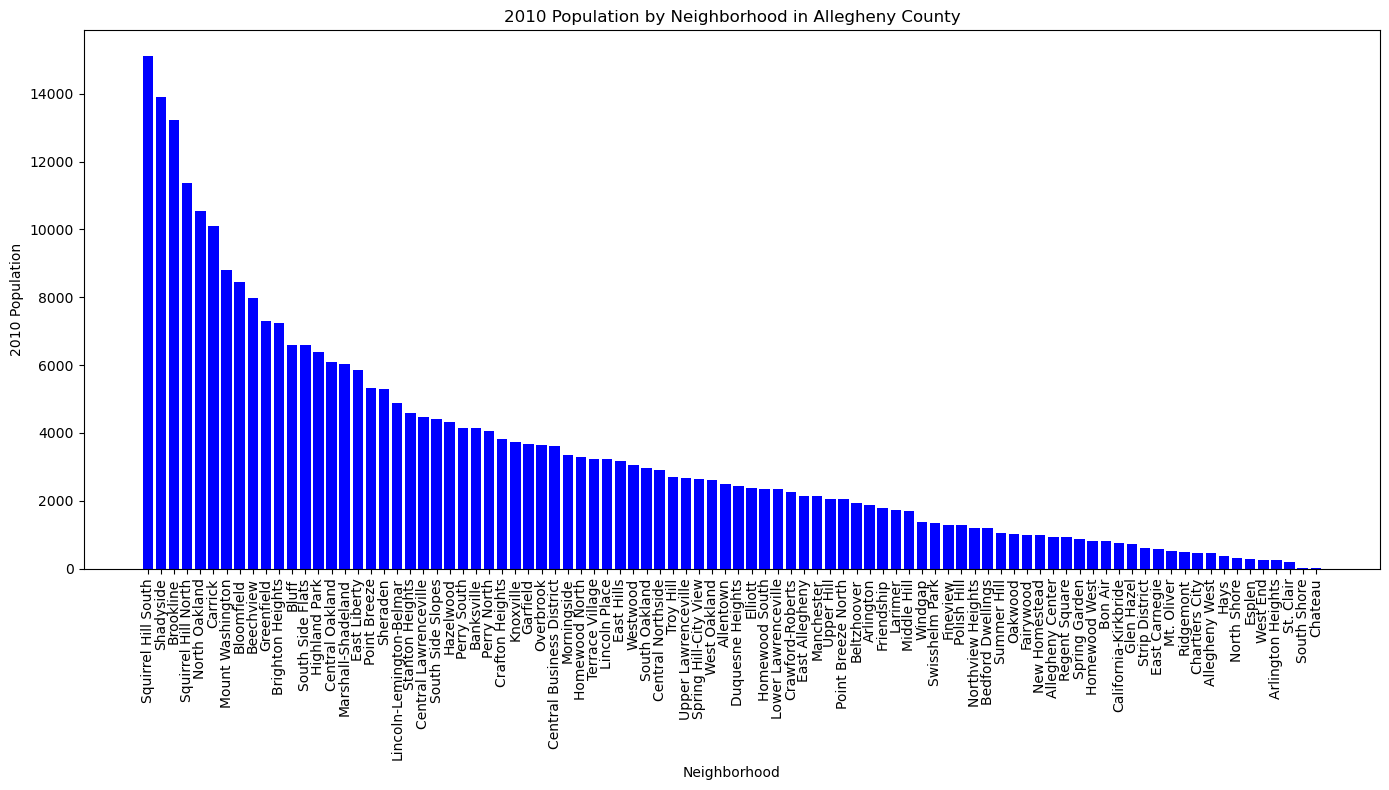

In [12]:
# Clean the data
df.columns = df.columns.str.strip()

# Pull wanted data from dataset
df_2010 = df[['Neighborhood', 'Pop. 2010']].dropna()

# Convert to numeric values
df_2010['Pop. 2010'] = pd.to_numeric(df_2010['Pop. 2010'], errors='coerce')

# Sort the populations
df_sorted = df_2010.sort_values(by='Pop. 2010', ascending=False)

# Create Bar Chart
plt.figure(figsize=(14, 8))
plt.bar(df_sorted['Neighborhood'], df_sorted['Pop. 2010'], color='blue')
plt.xlabel('Neighborhood')
plt.ylabel('2010 Population')
plt.title('2010 Population by Neighborhood in Allegheny County')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Bar Chart Pt. 2**

This bar chart helps represent the total area (in acres) of each neighborhood.

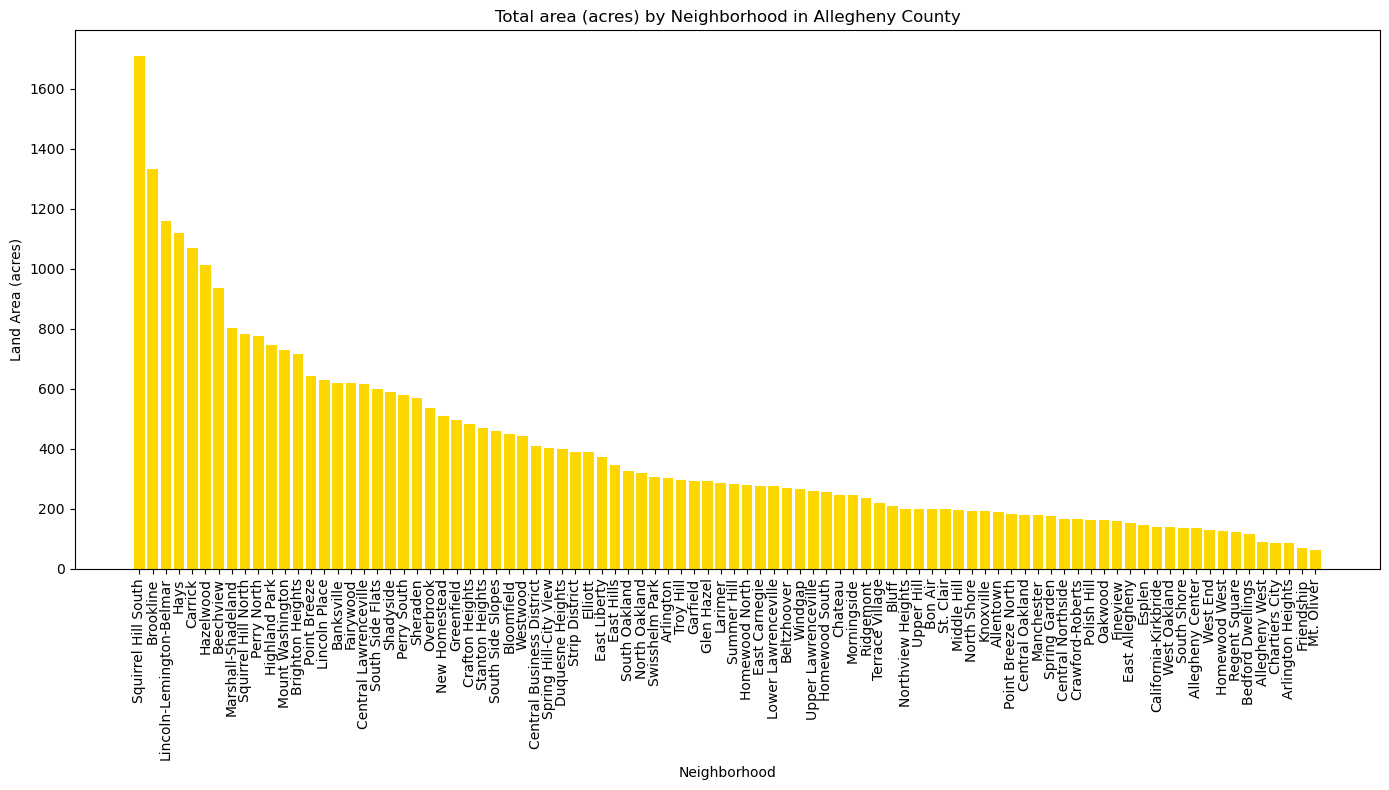

In [13]:
# Clean the data
df.columns = df.columns.str.strip()

# Pull wanted data from dataset
df_2010 = df[['Neighborhood', 'Land Area (acres)']].dropna()

# Convert to numeric values
df_2010['Land Area (acres)'] = pd.to_numeric(df_2010['Land Area (acres)'], errors='coerce')

# Sort the populations
df_sorted = df_2010.sort_values(by='Land Area (acres)', ascending=False)

# Create Bar Chart
plt.figure(figsize=(14, 8))
plt.bar(df_sorted['Neighborhood'], df_sorted['Land Area (acres)'], color='gold')
plt.xlabel('Neighborhood')
plt.ylabel('Land Area (acres)')
plt.title('Total area (acres) by Neighborhood in Allegheny County')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Combined Density Chart**

This density map helps combine data to visualize how dense each neighborhood in Pittsburgh is. 

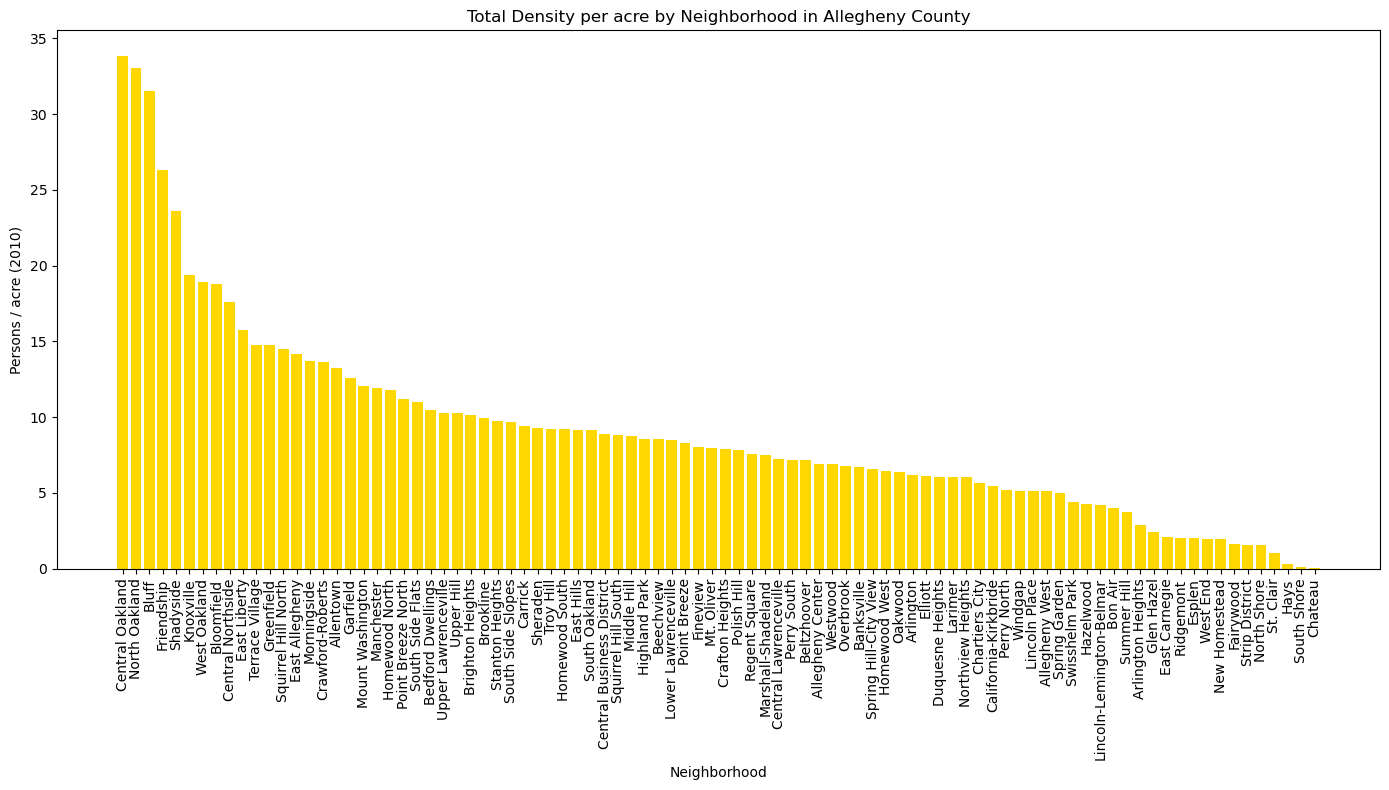

In [49]:
# Clean the data
df.columns = df.columns.str.strip()

# Pull wanted data from dataset
df_2010 = df[['Neighborhood', 'Persons / acre (2010)']].dropna()

# Convert to numeric values
df_2010['Persons / acre (2010)'] = pd.to_numeric(df_2010['Persons / acre (2010)'], errors='coerce')

# Sort the populations
df_sorted = df_2010.sort_values(by='Persons / acre (2010)', ascending=False)

# Create Bar Chart
plt.figure(figsize=(14, 8))
plt.bar(df_sorted['Neighborhood'], df_sorted['Persons / acre (2010)'], color='gold')
plt.xlabel('Neighborhood')
plt.ylabel('Persons / acre (2010)')
plt.title('Total Density per acre by Neighborhood in Allegheny County')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **The Best Neighborhood**

Denstiy wise Central Oakland is the best neighborhood, but were not looking for most dense were looking for wealthiest. That title belongs to Squrriel Hill North for being the least dense and having most wealthy house prices.

# **Conclusion**

In conclusion, the wealthiest neighborhood is Squrriel Hill. Although Squrriel Hill is the wealthiest, it's not my favorite neighborhood in Pittsburgh. My favorite neighborhood in Pittsburgh is North Shore. It ranks near the bottom in population density but that's because North Shore is mainly a tourist area. It houses both PNC Park and Heinz Field along with a handful of other venues. I've spent almost 10 years going to Steeler games and other events with friends and family and North Shore never disappoints. It's a great place to hangout and walk around and experience Downtown Pittsburgh without actually being in Downtown. Whether you're going to a concert, game, or other events North Shore is the place to go. 